In [2]:
import numpy as np
import matplotlib.pyplot as plt

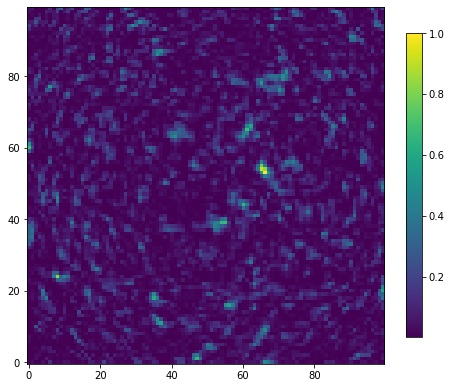

In [143]:
Vp=5; depth=30
### make grid ###
value = 1
grid=[]
for i in np.arange(0,100,value):
    for j in np.arange(0,100,value):
        grid.append([i,j])
### station information ###
x = []
y = []
with open('stations.xy.txt','r') as f:
    for lines in f:
        # print(lines.split('\n')[0])
        locations = lines.split('\n')[0]
        x.append(float(locations.split()[0]))
        y.append(float(locations.split()[1]))
### tremor data ###
data = []
time = []
with open('tremor_data.txt') as f:
    for lines in f:
        data.append(float(lines.split('\n')[0].split()[1]))
        time.append(float(lines.split('\n')[0].split()[0]))
alldata = []
timeay = np.array(time[1+5001:5000+5001])
for ii in range(0,20):
    alldata.append(np.array(data[1+5001*ii:5000+5001*ii]))
### predict time ###
predT=[]
for point in grid:
    xx=point[0]
    yy=point[1]
    time=np.sqrt((xx-x)**2+(yy-y)**2+depth**2)/Vp
    predT.append(time)
### stack data ###
amp = []
for times in predT:
    sumay = 0
    for indx in range (len(x)):
        bgindx = np.where(timeay>=times[indx])
        sumay += alldata[indx][bgindx][0]
    amp.append(np.sqrt((sumay**2)))

norm = max(amp)
amp /= norm
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
mapp=np.array(amp**2).reshape(int(100/value),int(100/value))
pos = plt.imshow(np.rot90(mapp))
ax.invert_yaxis()
fig.colorbar(pos, anchor=(0, 0.3), shrink=0.7)

array([[1.09407574e-02, 3.39616252e-02, 4.91881300e-02, ...,
        4.56045942e-03, 7.15260303e-03, 7.46224287e-04],
       [5.44701019e-02, 3.19744712e-02, 7.39062838e-03, ...,
        7.99767545e-04, 7.28159482e-03, 3.64177982e-03],
       [1.71416878e-02, 1.73692416e-02, 1.76346647e-02, ...,
        1.25905576e-02, 1.67730736e-03, 1.92330823e-03],
       ...,
       [1.54564762e-02, 1.12941378e-03, 7.84648641e-03, ...,
        4.44787876e-02, 4.78701161e-02, 5.11823532e-03],
       [3.57256877e-03, 5.36849731e-07, 7.40268108e-03, ...,
        2.77687820e-02, 3.96095953e-03, 1.97928072e-03],
       [1.25863817e-02, 5.00435019e-03, 4.66355875e-04, ...,
        6.66903920e-04, 3.03568641e-03, 1.34934200e-04]])

In [128]:
mapp.T

array([[1.09407574e-02, 5.44701019e-02, 1.71416878e-02, ...,
        1.54564762e-02, 3.57256877e-03, 1.25863817e-02],
       [3.39616252e-02, 3.19744712e-02, 1.73692416e-02, ...,
        1.12941378e-03, 5.36849731e-07, 5.00435019e-03],
       [4.91881300e-02, 7.39062838e-03, 1.76346647e-02, ...,
        7.84648641e-03, 7.40268108e-03, 4.66355875e-04],
       ...,
       [4.56045942e-03, 7.99767545e-04, 1.25905576e-02, ...,
        4.44787876e-02, 2.77687820e-02, 6.66903920e-04],
       [7.15260303e-03, 7.28159482e-03, 1.67730736e-03, ...,
        4.78701161e-02, 3.96095953e-03, 3.03568641e-03],
       [7.46224287e-04, 3.64177982e-03, 1.92330823e-03, ...,
        5.11823532e-03, 1.97928072e-03, 1.34934200e-04]])

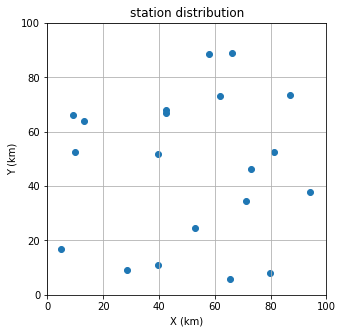

In [2]:
#station distribution
x = []
y = []
with open('stations.xy.txt','r') as f:
    for lines in f:
        # print(lines.split('\n')[0])
        locations = lines.split('\n')[0]
        x.append(float(locations.split()[0]))
        y.append(float(locations.split()[1]))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
plt.scatter(x,y)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('station distribution')
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid(True)

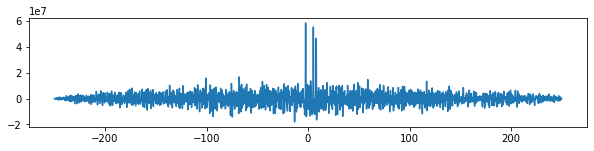

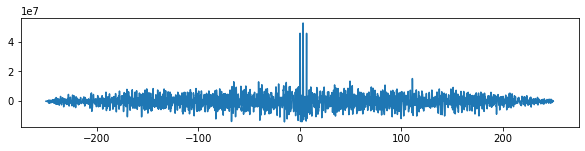

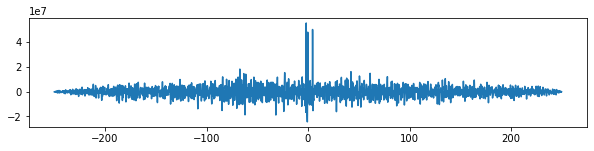

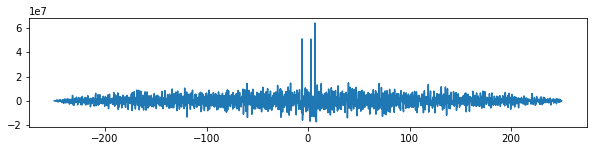

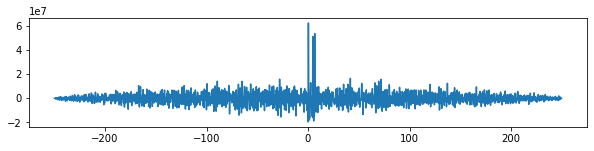

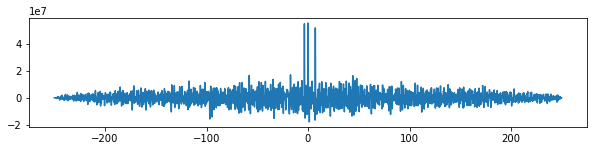

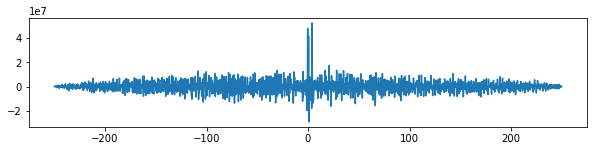

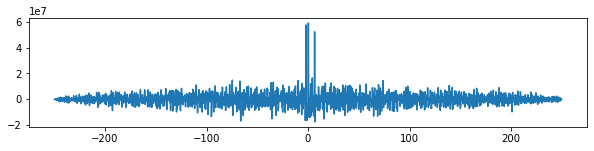

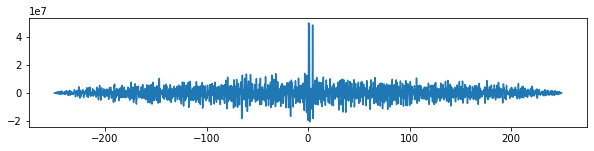

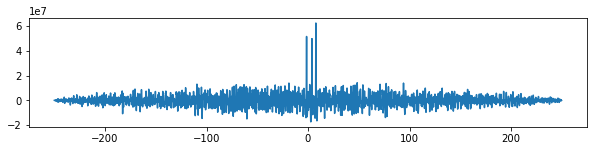

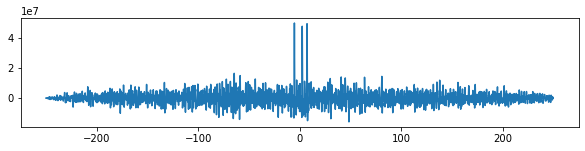

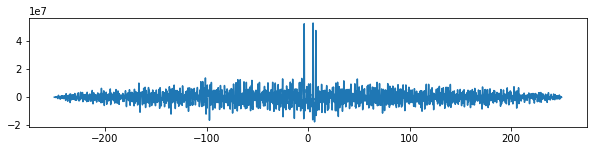

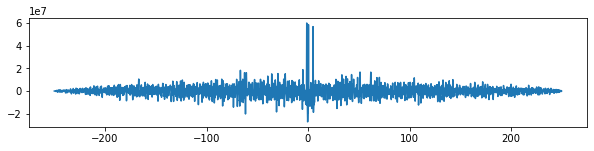

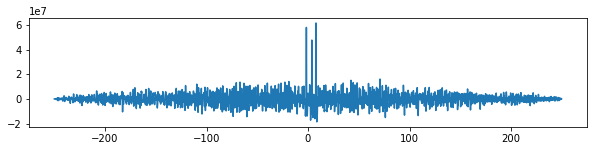

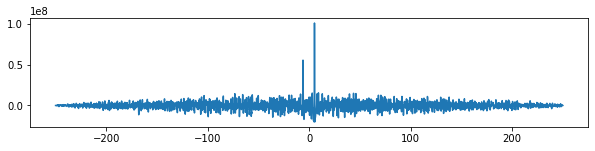

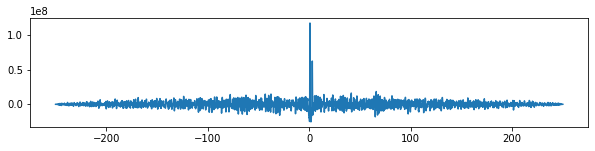

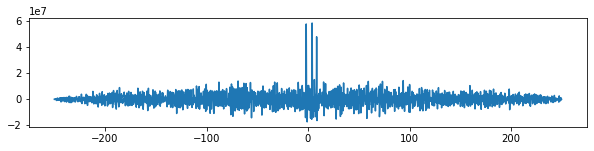

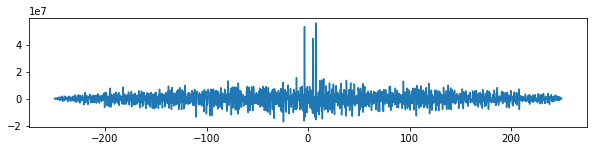

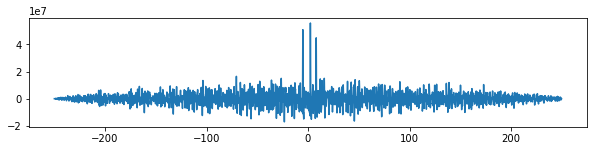

In [10]:
#waveform
data = []
time = []
header = Stats()
header.sampling_rate = 20
header.delta = 0.05
header.npts = 5000
with open('tremor_data.txt') as f:
    for lines in f:
        data.append(float(lines.split('\n')[0].split()[1]))
#         time.append(float(lines.split('\n')[0].split()[0]))
        # print(comp)
        
alldata = []
for ii in range(0,20):
    alldata.append(Trace(data=np.array(data[1+5001*ii:5000+5001*ii]), header=header))

st = Stream(traces=alldata)
# st.filter('bandpass',freqmin=0.05,freqmax=0.1)

corr=[]
for rec_indx in range(1,len(st)):
    cor = np.correlate(st[0],st[rec_indx],'full')
    corr.append(cor)

time=np.arange(0,len(corr[0]))*0.05-250
for ii in range(0,len(corr)):
    fig = plt.figure(figsize=(10,2))
    plt.plot(time,corr[ii])

In [7]:
print(corr)

[array([-3179404.61737839]), array([-7070867.48195029]), array([ 14120081.74459065]), array([-306079.64961614]), array([-18669103.70124489]), array([ 50942472.4958742]), array([-3224184.36855092]), array([-13958649.36866335]), array([-15464624.41447175]), array([ 1678364.53613925]), array([-8067824.29686752]), array([-3830148.62183639]), array([-19059690.68215086]), array([ 4476751.53061644]), array([-5517523.50596024]), array([-19645255.81521419]), array([-6744711.37515103]), array([ 2855957.49349411]), array([ 523848.65963737])]
